In [24]:
# importing useful libs on the go
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.grid_search import RandomizedSearchCV
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import KFold
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import cross_validation
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import mean_absolute_error
import collections

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

In [2]:
from matplotlib.cm import register_cmap

In [3]:
train = pd.read_csv('train_final.csv')

In [4]:
test = pd.read_csv('test_final.csv')

In [6]:
# train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index([u'ACT_TYPE', u'GENDER', u'LEGAL_ENTITY', u'AGE', u'CC_HOLD',
        u'CC_ACTIVE', u'DC_HOLD', u'DC_ACTIVE', u'COC_ELIGIBLE',
        u'EOP_BAL_MON_01', u'FINANCE_MON_01', u'JOBS_MON_01',
        u'LIFESTYLE_MON_01', u'INMON_01KET_MON_01', u'TRAVEL_MON_01',
        u'CHANNEL_CLICK_DISP', u'DESIGNATION_FINAL', u'TOP9_CITY',
        u'PL2CC_ELIGIBLE', u'PA_PQ_TAG', u'NEFT_CC_CATEGORY',
        u'NEFT_DC_CATEGORY', u'TPT_DC_CATEGORY_MON_01',
        u'TPT_CC_CATEGORY_MON_01', u'IMPS_CC_CATEGORY_MON_01', u'CLOSED_DATE',
        u'TOP_100_CORP', u'TOP_800_CORP', u'TOP_CORP_TAG', u'CREDIT_ACT',
        u'DEBIT_ACT', u'RESPONDERS', u'TAG', u'CCHOLD', u'CCACTIVE',
        u'DCACTIVE', u'DC_SPEND', u'CC_SPEND', u'MATURITY', u'L_ACTIVE',
        u'TOP10_14_CITY', u'INQ', u'TAG2'],
       dtype='object'),
 dtype('float64'): Index([u'PM_FD_MON_01', u'CR_LIMIT', u'C_COUNT_L3_MON_06',
        u'D_COUNT_L3_MON_06', u'C_COUNT_L3_MON_05', u'D_COUNT_L3_MON_05',
        u'C_COUNT_

In [7]:
# train['RESPONDERS'].value_counts()

0    295388
1      4612
Name: RESPONDERS, dtype: int64

In [5]:
X_train = train.drop(['RESPONDERS'], axis=1, inplace=False)
y_train = train['RESPONDERS']
Xtrain_std = StandardScaler().fit_transform(X_train)

In [6]:
y_std = LabelEncoder().fit_transform(y_train)

In [7]:
Xtest_std = StandardScaler().fit_transform(test)

In [10]:
# mean_vec = np.mean(Xtrain_std, axis=0)
# cov_mat = (Xtrain_std - mean_vec).T.dot((Xtrain_std - mean_vec)) / (Xtrain_std.shape[0]-1)
# print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00000333  0.08708257  0.02085677 ..., -0.00427636 -0.01730842
   0.03220846]
 [ 0.08708257  1.00000333  0.03884103 ..., -0.02797137 -0.01822406
  -0.02689728]
 [ 0.02085677  0.03884103  1.00000333 ..., -0.00204195 -0.00224823
   0.00154239]
 ..., 
 [-0.00427636 -0.02797137 -0.00204195 ...,  1.00000333  0.01402502
   0.02948647]
 [-0.01730842 -0.01822406 -0.00224823 ...,  0.01402502  1.00000333
   0.01053406]
 [ 0.03220846 -0.02689728  0.00154239 ...,  0.02948647  0.01053406
   1.00000333]]


In [11]:
# cov_mat = np.cov(Xtrain_std.T)
# eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  5.50041262e-02   5.94346823e-02   1.93396631e-02 ...,   4.91956120e-03
    2.52828290e-03  -3.93167841e-05]
 [  2.41051322e-02  -3.14684628e-02   8.75089821e-03 ...,   7.80988752e-02
    6.07990205e-02   1.14657674e-01]
 [  2.80035037e-03  -7.32930779e-04   2.42007550e-03 ...,   5.45036515e-03
   -4.45073469e-02  -4.79188492e-02]
 ..., 
 [ -1.94509257e-02   2.08001491e-02  -6.15076252e-03 ...,  -4.64959677e-02
    9.49352260e-02   2.80684296e-02]
 [ -2.52392629e-02   6.39263552e-03  -8.57900604e-03 ...,  -1.09715276e-01
   -9.48112756e-02  -7.51500696e-02]
 [ -2.51713366e-02   3.45089142e-02   5.63139314e-03 ...,   6.42392851e-03
   -1.80442420e-02  -4.38432261e-02]]

Eigenvalues 
[  1.78901908e+01   5.56307023e+00   4.37587379e+00   3.24899395e+00
   2.57953140e+00   2.22593870e+00   2.10968990e+00   1.91042896e+00
   1.69848565e+00   1.61882476e+00   1.50007905e+00   1.44365726e+00
   1.35290675e+00   1.70379406e-02   9.99914777e-04   4.81841099e-02
   5.21484108e-0

In [12]:
# # Visually confirm that the list is correctly sorted by decreasing eigenvalues
# eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#     print(i[0])

Eigenvalues in descending order:
17.8901907579
5.56307023153
4.3758737852
3.24899395331
2.57953140013
2.22593869743
2.10968989506
1.91042896185
1.69848564749
1.61882475696
1.50007904847
1.44365725688
1.35290675375
0.0170379405913
0.000999914777007
0.0481841099209
0.0521484108288
0.07401000408
0.0786349997577
0.0938609864591
6.78787620237e-15
1.32793799023
0.102364658396
0.117011092134
0.131718245447
0.149428577919
0.153837536452
0.17672187793
0.191775367319
0.203575584294
0.219033855924
0.226247985905
0.241170627201
1.23594370708
1.22485729879
0.26749391123
0.268038822997
0.290280297937
0.317808588897
0.307501958938
1.2094601802
0.347278733139
0.373295990664
0.400705455951
0.356257160895
0.352656133451
0.366676533818
0.420321540517
1.18416512237
0.480028967184
0.446796205017
0.451182247878
0.501146788385
0.506195198847
1.13266454419
0.565657641074
0.525028117682
0.551752979776
0.543772694209
0.535863455185
0.531283334342
0.607099145725
0.594161490942
1.10343387599
0.648036101627
0.6330

In [13]:
# pca = PCA(n_components=15)
# pca.fit_transform(X_train)
# print pca.explained_variance_ratio_

[  5.78859204e-01   3.84546539e-01   1.64995900e-02   9.24675029e-03
   2.41732575e-03   2.32834962e-03   2.21338176e-03   8.85479112e-04
   7.48396863e-04   4.65198702e-04   2.74117940e-04   2.53895956e-04
   2.33148276e-04   2.05356575e-04   1.55718216e-04]


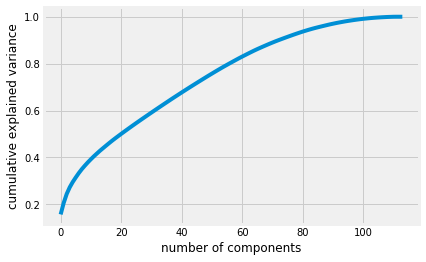

In [14]:
# #Explained variance
# pca = PCA().fit(Xtrain_std)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.show()

In [8]:
pca = PCA(n_components=80)

In [9]:
pca.fit(Xtrain_std)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_t_train = pca.transform(Xtrain_std)

In [11]:
X_t_test = pca.transform(Xtest_std)

In [12]:
# train_labels = dtrain.get_label()

# ratio = float(np.sum(train_labels == 0) / np.sum(train_labels == 1))
# para['scale_pos_weight'] = ratio

ratio = 0.015625

In [63]:
# rf = RandomForestClassifier(n_estimators=1000, criterion= 'gini', max_depth=20, min_samples_split=2,
#                             min_samples_leaf=4, min_weight_fraction_leaf=0.0, max_features='auto',
#                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
#                             bootstrap=True, oob_score=True, n_jobs=-1, random_state=42, verbose=2,
#                             warm_start=True, class_weight='balanced')

In [39]:
# parameters = {
#               'max_features': ['auto','sqrt'],
#               'max_depth': [15,20,25],
#               'min_samples_split': [2,3],
#               'min_samples_leaf': [4,5],
#               'n_estimators': [200]}

# n_iter_search = 10

In [40]:
# clf_rf = GridSearchCV(rf, parameters, n_jobs=-1, 
#                    cv=StratifiedKFold(y_std, n_folds=5, shuffle=True), 
#                    scoring='accuracy',
#                    verbose=2, refit=True)

In [14]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

In [15]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [19]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 200,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 20,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 1,
    'class_weight':'balanced'
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':200,
    #'max_features': 0.5,
    'max_depth': 20,
    'min_samples_leaf': 2,
    'verbose': 1,
    'class_weight': 'balanced'
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 50,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 200,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 1
}


# Support Vector Classifier parameters 
# svc_params = {
#     'kernel' : 'linear',
#     'C' : 0.025
#     }

#Decision Tree Classifier paramerters
dt_params = {
    'max_depth': 200,
    'class_weight' : 'balanced'
}


In [20]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
dt = SklearnHelper(clf=DecisionTreeClassifier, seed=SEED, params=dt_params)
# svc = SklearnHelper(clf = SVC, seed=SEED, params=svc_params)

In [21]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, Xtrain_std, y_std, Xtest_std) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,Xtrain_std, y_std, Xtest_std) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, Xtrain_std, y_std, Xtest_std) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,Xtrain_std, y_std, Xtest_std) # Gradient Boost
dt_oof_train, dt_oof_test = get_oof(dt, Xtrain_std,y_std, Xtest_std) #Decision Trees
# svc_oof_train, svc_oof_test = get_oof(svc,Xtrain_std, y_std, Xtest_std) # Support Vector Classifier

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tas

      Iter       Train Loss   Remaining Time 
         1           0.1411           10.33m
         2           0.1364           10.53m
         3           0.1331           10.46m
         4           0.1307           10.48m
         5           0.1287           10.46m
         6           0.1267           10.44m
         7           0.1251           10.41m
         8           0.1236           10.37m
         9           0.1223           10.27m
        10           0.1211           10.22m
        20           0.1146            9.58m
        30           0.1116            8.76m
        40           0.1096            8.01m
        50           0.1083            7.38m
        60           0.1069            6.75m
        70           0.1057            6.17m
        80           0.1048            5.61m
        90           0.1037            5.09m
       100           0.1029            4.57m
       200           0.0947            0.00s
      Iter       Train Loss   Remaining Time 
        

In [27]:
pickle.dump(rf, open('rf', 'wb'))
pickle.dump(et, open('et', 'wb'))
pickle.dump(ada, open('ada', 'wb'))
pickle.dump(gb, open('gb', 'wb'))
pickle.dump(dt, open('dt', 'wb'))

In [22]:
rf_feature = rf.feature_importances(Xtrain_std,y_std)
et_feature = et.feature_importances(Xtrain_std, y_std)
ada_feature = ada.feature_importances(Xtrain_std, y_std)
gb_feature = gb.feature_importances(Xtrain_std,y_std)
dt_feature = dt.feature_importances(Xtrain_std, y_std)

[  3.32811145e-02   4.04782609e-03   6.43849156e-03   1.00864607e-06
   2.18295723e-02   8.46103797e-03   6.76789843e-03   1.72217600e-03
   4.98026263e-03   8.19285014e-05   2.12254276e-02   3.78168617e-03
   1.42394515e-02   7.72773834e-03   2.81730466e-04   1.26869387e-03
   5.47172793e-06   2.60739401e-03   7.15399503e-03   7.98793164e-02
   6.60090207e-03   2.32143772e-03   4.29178806e-02   7.25004317e-03
   4.83554519e-03   3.92732384e-03   4.76075753e-03   3.82878734e-03
   2.25677524e-03   4.27028691e-03   2.48189113e-03   2.79252257e-03
   4.70162573e-03   2.53297713e-03   3.01404020e-03   4.16987651e-03
   4.05817531e-03   2.98740776e-03   4.67255997e-03   1.00295309e-02
   1.97283967e-02   1.75331500e-02   1.58218032e-02   2.12078661e-03
   1.89339040e-03   3.82865957e-03   1.46810629e-02   1.52927803e-02
   7.14697632e-03   1.04885667e-02   3.04595644e-04   2.02306437e-02
   2.16224160e-02   2.00756589e-02   8.19645891e-03   1.03061498e-02
   6.64096465e-03   7.67508833e-03

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.2min finished


[  1.12117520e-02   8.18195267e-03   1.31352826e-02   1.46661734e-05
   1.24116895e-02   2.58346859e-02   2.27028190e-02   3.63508117e-03
   1.58711271e-02   3.84651260e-04   1.51296740e-02   8.48726615e-03
   1.26129933e-02   1.97196016e-02   8.28471654e-04   3.75674857e-03
   3.79693986e-05   7.08338886e-03   1.17209813e-02   7.09943027e-02
   1.28768646e-02   5.88303337e-03   8.28437697e-03   7.67122547e-03
   3.95816074e-03   3.27584482e-03   5.18246461e-03   3.25092895e-03
   2.95349058e-03   1.49276359e-03   2.53797333e-03   2.76731229e-03
   1.48849185e-03   2.54299792e-03   2.59711748e-03   4.87654589e-03
   2.92711765e-03   2.86796896e-03   9.77245465e-03   3.13051909e-03
   1.86997711e-02   2.00304478e-02   1.87728495e-02   5.54957272e-03
   4.83696818e-03   6.17080385e-03   1.19087742e-02   1.16623173e-02
   2.09895755e-02   3.43771889e-02   2.96759723e-04   1.79690626e-02
   2.57478901e-02   1.79208534e-02   9.90597417e-03   1.87352267e-02
   1.64601016e-02   1.09672386e-02

In [28]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
    'Random Forest feature importances': rf_feature,
    'Extra Trees  feature importances': et_feature,
    'AdaBoost feature importances': ada_feature,
    'Gradient Boost feature importances': gb_feature,
    'Decision Tree feature importance' : dt_feature
    })

In [125]:
# # Scatter plot 
# trace = go.Scatter(
#     y = feature_dataframe['Random Forest feature importances'].values,
#     x = feature_dataframe['features'].values,
#     mode='markers',
#     marker=dict(
#         sizemode = 'diameter',
#         sizeref = 1,
#         size = 25,
# #       size= feature_dataframe['AdaBoost feature importances'].values,
#         #color = np.random.randn(500), #set color equal to a variable
#         color = feature_dataframe['Random Forest feature importances'].values,
#         colorscale='Portland',
#         showscale=True
#     ),
#     text = feature_dataframe['features'].values
# )
# data = [trace]

# layout= go.Layout(
#     autosize= True,
#     title= 'Random Forest Feature Importance',
#     hovermode= 'closest',
# #     xaxis= dict(
# #         title= 'Pop',
# #         ticklen= 5,
# #         zeroline= False,
# #         gridwidth= 2,
# #     ),
#     yaxis=dict(
#         title= 'Feature Importance',
#         ticklen= 5,
#         gridwidth= 2
#     ),
#     showlegend= False
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig,filename='scatter2010')

# # Scatter plot 
# trace = go.Scatter(
#     y = feature_dataframe['Extra Trees  feature importances'].values,
#     x = feature_dataframe['features'].values,
#     mode='markers',
#     marker=dict(
#         sizemode = 'diameter',
#         sizeref = 1,
#         size = 25,
# #       size= feature_dataframe['AdaBoost feature importances'].values,
#         #color = np.random.randn(500), #set color equal to a variable
#         color = feature_dataframe['Extra Trees  feature importances'].values,
#         colorscale='Portland',
#         showscale=True
#     ),
#     text = feature_dataframe['features'].values
# )
# data = [trace]

# layout= go.Layout(
#     autosize= True,
#     title= 'Extra Trees Feature Importance',
#     hovermode= 'closest',
# #     xaxis= dict(
# #         title= 'Pop',
# #         ticklen= 5,
# #         zeroline= False,
# #         gridwidth= 2,
# #     ),
#     yaxis=dict(
#         title= 'Feature Importance',
#         ticklen= 5,
#         gridwidth= 2
#     ),
#     showlegend= False
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig,filename='scatter2010')

# # Scatter plot 
# trace = go.Scatter(
#     y = feature_dataframe['AdaBoost feature importances'].values,
#     x = feature_dataframe['features'].values,
#     mode='markers',
#     marker=dict(
#         sizemode = 'diameter',
#         sizeref = 1,
#         size = 25,
# #       size= feature_dataframe['AdaBoost feature importances'].values,
#         #color = np.random.randn(500), #set color equal to a variable
#         color = feature_dataframe['AdaBoost feature importances'].values,
#         colorscale='Portland',
#         showscale=True
#     ),
#     text = feature_dataframe['features'].values
# )
# data = [trace]

# layout= go.Layout(
#     autosize= True,
#     title= 'AdaBoost Feature Importance',
#     hovermode= 'closest',
# #     xaxis= dict(
# #         title= 'Pop',
# #         ticklen= 5,
# #         zeroline= False,
# #         gridwidth= 2,
# #     ),
#     yaxis=dict(
#         title= 'Feature Importance',
#         ticklen= 5,
#         gridwidth= 2
#     ),
#     showlegend= False
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig,filename='scatter2010')

# # Scatter plot 
# trace = go.Scatter(
#     y = feature_dataframe['Gradient Boost feature importances'].values,
#     x = feature_dataframe['features'].values,
#     mode='markers',
#     marker=dict(
#         sizemode = 'diameter',
#         sizeref = 1,
#         size = 25,
# #       size= feature_dataframe['AdaBoost feature importances'].values,
#         #color = np.random.randn(500), #set color equal to a variable
#         color = feature_dataframe['Gradient Boost feature importances'].values,
#         colorscale='Portland',
#         showscale=True
#     ),
#     text = feature_dataframe['features'].values
# )
# data = [trace]

# layout= go.Layout(
#     autosize= True,
#     title= 'Gradient Boosting Feature Importance',
#     hovermode= 'closest',
# #     xaxis= dict(
# #         title= 'Pop',
# #         ticklen= 5,
# #         zeroline= False,
# #         gridwidth= 2,
# #     ),
#     yaxis=dict(
#         title= 'Feature Importance',
#         ticklen= 5,
#         gridwidth= 2
#     ),
#     showlegend= False
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig,filename='scatter2010')

In [29]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,AdaBoost feature importances,Decision Tree feature importance,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features,mean
0,None,None,None,None,None,Unnamed: 0,NaN
1,None,None,None,None,None,ACT_TYPE,NaN
2,None,None,None,None,None,GENDER,NaN


In [127]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')


In [30]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel(),
    'DecisionTree' : dt_oof_train.ravel()
    })
base_predictions_train.head()

,AdaBoost,DecisionTree,ExtraTrees,GradientBoost,RandomForest
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [31]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [32]:
x_train_ens = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, dt_oof_train), axis=1)
x_test_ens = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, dt_oof_test), axis=1)

In [ ]:
gbm = xgb.XGBClassifier(
 learning_rate = 0.07,
 n_estimators= 1000,
 max_depth= 20,
 min_child_weight= 4,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=64).fit(x_train_ens, y_std)


predictions = gbm.predict(x_test_ens)

In [42]:
collections.Counter(predictions)

Counter({0: 195502, 1: 4498})

In [35]:
test_cust = pd.read_csv('test.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (8,11,12,13,14,15,16,17,18,19,26,28,29,30,82,83,85,91,269,325,326,327,328) have mixed types. Specify dtype option on import or set low_memory=False.



In [43]:
cust = test_cust['CUSTOMER_ID']

In [44]:
test_cust['RESPONDERS'] = predictions

In [45]:
ans = test_cust[['CUSTOMER_ID','RESPONDERS']]

In [46]:
ans.to_csv('HOUND10.csv',index=False)